## Прогнозирование временных рядов

In [26]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [27]:
df = pd.read_csv('Chicago_hotels.csv', sep=';')
df.head()
df1 = df.iloc[:112, :]
df1.head()

,date1,date2,x1,x2,x3,x4
0,January,1994,44.3,104.04,51.9,72.15
1,February,1994,54.7,102.74,60.1,73.47
2,March,1994,61.9,105.23,65.0,74.91
3,April,1994,69.1,113.63,69.8,79.06
4,May,1994,70.8,120.77,72.4,82.07


Проанализируем график временного ряда. Тип тренда нелинеен, предположительно имеет квадратичную природу.
Сезонные изменения мультипликативны.

Text(0, 0.5, 'log10 долларов')

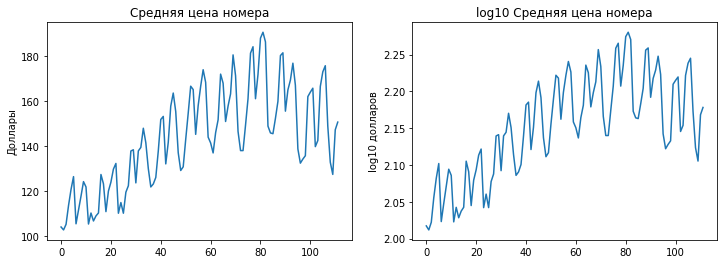

In [28]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df1['x2'].plot(ax=ax1)
ax1.set_title(u'Средняя цена номера')
ax1.set_ylabel(u'Доллары')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df1['x2'])).plot(ax=ax2)
ax2.set_title(u'log10 Средняя цена номера')
ax2.set_ylabel(u'log10 долларов')

In [29]:
df1 = df1.drop(columns=['x1', 'x3', 'x4'])
df1.head()

,date1,date2,x2
0,January,1994,104.04
1,February,1994,102.74
2,March,1994,105.23
3,April,1994,113.63
4,May,1994,120.77


In [30]:
df1['month_num'] = range(1, len(df1) + 1)

df1.head()

,date1,date2,x2,month_num
0,January,1994,104.04,1
1,February,1994,102.74,2
2,March,1994,105.23,3
3,April,1994,113.63,4
4,May,1994,120.77,5


Раскодируем категориальную переменную месяц методом One-Hot encoding.

In [31]:
df1["m01"] = ([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] * 10)[0:len(df1)]
df1["m02"] = ([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] * 10)[0:len(df1)]
df1["m03"] = ([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] * 10)[0:len(df1)]
df1["m04"] = ([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] * 10)[0:len(df1)]
df1["m05"] = ([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] * 10)[0:len(df1)]
df1["m06"] = ([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] * 10)[0:len(df1)]
df1["m07"] = ([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] * 10)[0:len(df1)]
df1["m08"] = ([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] * 10)[0:len(df1)]
df1["m09"] = ([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] * 10)[0:len(df1)]
df1["m10"] = ([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] * 10)[0:len(df1)]
df1["m11"] = ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] * 10)[0:len(df1)]
df1["m12"] = ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] * 10)[0:len(df1)]

In [32]:
df1.head()

,date1,date2,x2,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,January,1994,104.04,1,1,0,0,0,0,0,0,0,0,0,0,0
1,February,1994,102.74,2,0,1,0,0,0,0,0,0,0,0,0,0
2,March,1994,105.23,3,0,0,1,0,0,0,0,0,0,0,0,0
3,April,1994,113.63,4,0,0,0,1,0,0,0,0,0,0,0,0
4,May,1994,120.77,5,0,0,0,0,1,0,0,0,0,0,0,0


In [33]:
y = np.log10(df1['x2'])
X = df1.drop(columns=['x2', 'date1', 'date2'])

In [34]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

<AxesSubplot:>

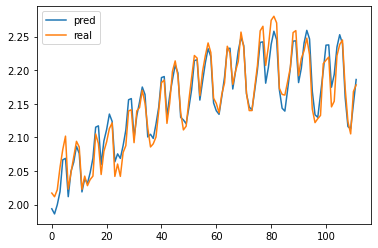

In [35]:
pred = pd.DataFrame({
    'pred': model.predict(X_poly),
    'real': y})
pred.plot()

<AxesSubplot:>

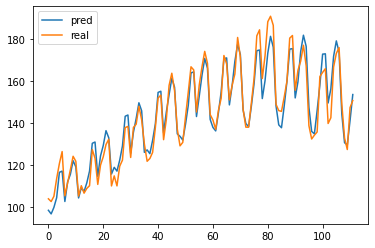

In [36]:
pred= pd.DataFrame({
    'pred': 10 ** model.predict(X_poly),
    'real': df1['x2']})
pred.plot()


In [37]:
print("Исторические данные за ", len(df1), " месяцев")
print("Это составляет ", len(df1)//12, " полных лет")
print("И еще ", len(df1) % 12, " месяцев.")

Исторические данные за  112  месяцев
Это составляет  9  полных лет
И еще  4  месяцев.


In [38]:
df2= pd.DataFrame()

df2['month_num'] = range(len(df1)+1, len(df1)+9)
df2["m01"] = ([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] * 10)[len(df1):]
df2["m02"] = ([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] * 10)[len(df1):]
df2["m03"] = ([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0] * 10)[len(df1):]
df2["m04"] = ([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0] * 10)[len(df1):]
df2["m05"] = ([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0] * 10)[len(df1):]
df2["m06"] = ([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] * 10)[len(df1):]
df2["m07"] = ([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0] * 10)[len(df1):]
df2["m08"] = ([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0] * 10)[len(df1):]
df2["m09"] = ([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0] * 10)[len(df1):]
df2["m10"] = ([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] * 10)[len(df1):]
df2["m11"] = ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] * 10)[len(df1):]
df2["m12"] = ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] * 10)[len(df1):]

In [39]:
df2_poly = poly.transform(df2)
model.predict(df2_poly)

array([2.22362157, 2.22378232, 2.16006406, 2.17669513, 2.22099809,
       2.23859241, 2.22506965, 2.14167926])

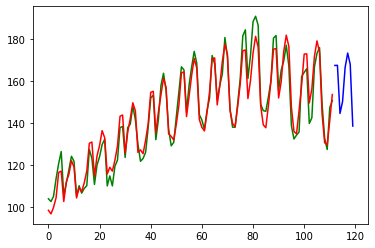

In [40]:
fig, ax = plt.subplots()
ax1.twinx()
ax.plot(list(range(len(df1))), df1.x2, color='g')
ax.plot(list(range(len(df1))), 10**model.predict(X_poly), color='r')
ax.plot(list(range(len(df1),120)),10**model.predict(df2_poly),color='b')